## Part 2 Visualization 

This is the second part of a project to scrape data from https://www.ratemyprofessors.com/.  

This part will focus on plotting the data and visualizing any relationships found.

In [41]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data = pd.read_csv("Utah_Professor_Data.csv")

data.head(10)

data.shape[0]

,Unnamed: 0,Department,Difficulty,Hot,Number_Ratings,Score,Tag,Take_Again,pk_id
0,0,Biology,3.8,0,174,3.5,Tough Grader,63%,261261
1,1,Business,3.8,1,169,4.2,Get ready to read,77%,335313
2,2,Biology,3.8,0,150,3.8,Tough Grader,65%,566286
3,3,Biology,3.8,1,134,4.3,Skip class You wont pass,100%,261621
4,4,Music,2.4,0,92,3.8,Hilarious,NaN,261242
5,5,Chemistry,3.9,1,91,4.3,Caring,NaN,261467
6,6,Accounting,3.7,0,86,3.4,Skip class You wont pass,71%,470792
7,7,Biology,4.3,0,85,4.5,Skip class You wont pass,90%,673272
8,8,Mathematics,3.1,1,78,4.2,Skip class You wont pass,67%,221339
9,9,Accounting,3.7,0,75,3.9,Respected,89%,651891


2584

In [42]:
data = data[data['Number_Ratings'] > 3]
data = data.drop('Unnamed: 0', axis=1)
data.shape[0]
data.head(1)

1151

,Department,Difficulty,Hot,Number_Ratings,Score,Tag,Take_Again,pk_id
0,Biology,3.8,0,174,3.5,Tough Grader,63%,261261


Now lets start plotting.

First some kernal density plots to get familiar with some of the columns and conditionals

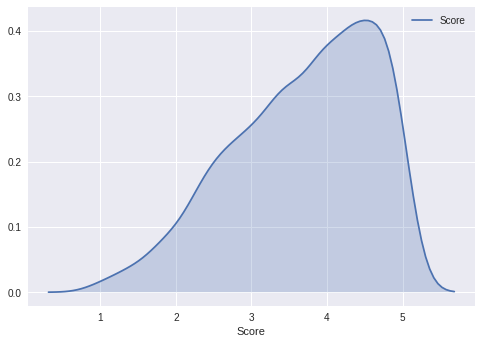

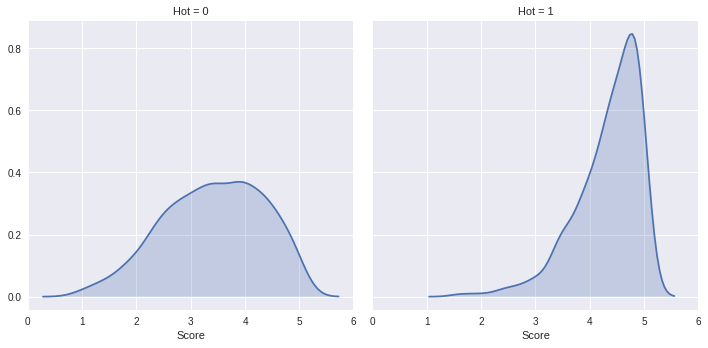

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(data['Score'],shade=True)
sns.despine(left=True, bottom=True)
plt.xlabel("Score")
plt.show()

g = sns.FacetGrid(data, col='Hot', size=5)
g.map(sns.kdeplot, "Score", shade=True)

sns.despine(left=True, bottom=True)
plt.show()

It looks like the overall distribution of score trends heavily to higher scores.  Perhaps this is due to only students who do well submiting reviews?

More interestingly, the scores for professors who are 'hot' are incredibly skewed to the right, and those who are not 'hot' are much closer to a normal distribution. . .

Some of the overall trend to the right might also be due to only a handfull of students submitting reviews for a professor.

-0.507378793051


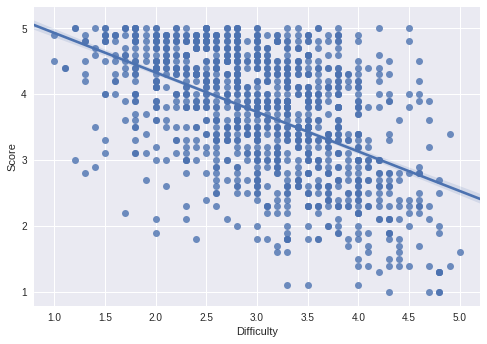

In [61]:
from scipy import stats
data['Difficulty'] = pd.to_numeric(data['Difficulty'])
data['Score'] = pd.to_numeric(data['Score'])

sns.regplot(x="Difficulty", y="Score", data=data, ci=68)
r, _ = stats.pearsonr(data['Difficulty'], data['Score'])
print(r)
plt.show()

A correlation of -.51 suggests at least a moderate correlation.  As difficulty increases, score tends to decrease.

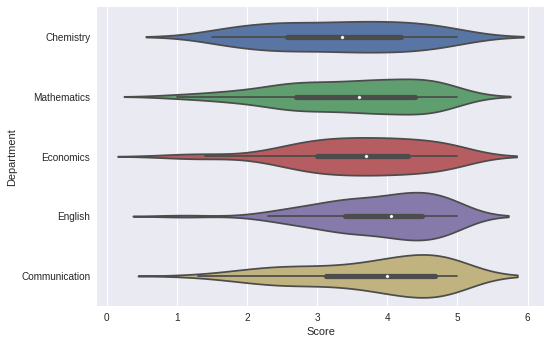

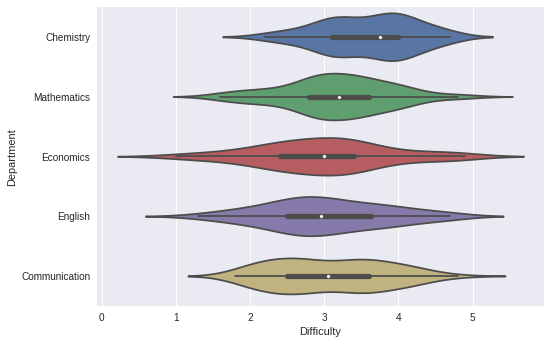

In [104]:
top_five_dep = data['Department'].value_counts().index[0:5].tolist()

data_dep = data[data['Department'].isin(top_five_dep)]

sns.violinplot(x="Score", y="Department", data=data_dep)
plt.show()

sns.violinplot(x="Difficulty", y="Department", data=data_dep)
plt.show()

The English department has both the highest average score, and the least amount of deviation in thier scores.

Chemisty has the highest difficulty, and has the lowest average score, aligning with the trend from earlier.

In [119]:
top_prof = data[data['Score'] >= 4.0]
bot_prof = data[data['Score'] <= 2.0]

top_prof['Tag'].value_counts()
bot_prof['Tag'].value_counts()


Gives good feedback         52
Participation matters       37
Get ready to read           35
Skip class You wont pass    31
Caring                      31
Amazing lectures            27
Tough Grader                26
LOTS OF HOMEWORK            23
Respected                   22
Hilarious                   21
Inspirational               15
Clear grading criteria      15
EXTRA CREDIT                14
GROUP PROJECTS               6
LECTURE HEAVY                4
BEWARE OF POP QUIZZES        3
ACCESSIBLE OUTSIDE CLASS     1
Name: Tag, dtype: int64

Tough Grader                22
LOTS OF HOMEWORK             5
LECTURE HEAVY                5
Get ready to read            4
Skip class You wont pass     4
GRADED BY FEW THINGS         1
BEWARE OF POP QUIZZES        1
Clear grading criteria       1
Name: Tag, dtype: int64

It seems giving good feedback is a key characteristic for a good professor.  And students don't take too kindly to grading harshly...

I actually would have thought lots of homework or lecture heavey would have scored higher...

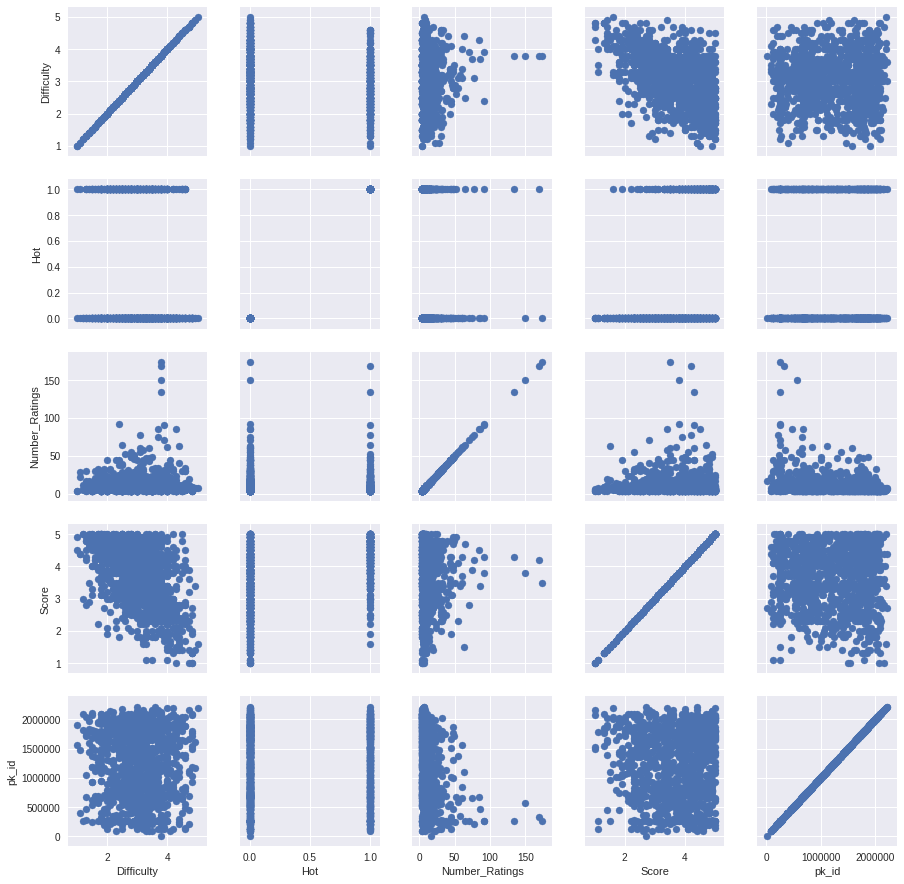

In [130]:
g = sns.PairGrid(data)
g.map(plt.scatter)
plt.show()

Just checking other pairwise relationships to see if there's any other significant correlation.

It seems like difficulty/score is still the only significant one.